In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = "ssd_mobilenet_v3_large_coco.pbtxt"
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = []   #empty list of python
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) #255/2=127.5
model.setInputMean([127.5,127.5,127.5])
model.setInputSwapRB(True)

< cv2.dnn.Model 0000022C8160EC50>

In [9]:
img = cv2.imread('img1.jpg')

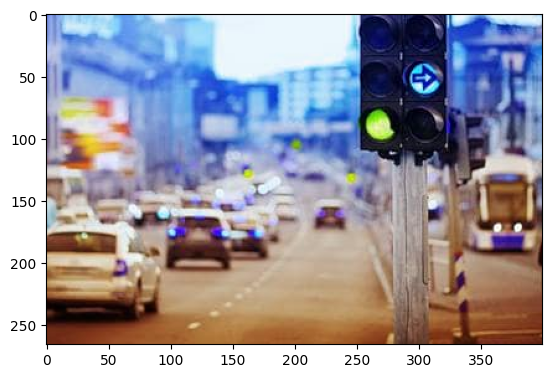

In [10]:
plt.imshow(img)

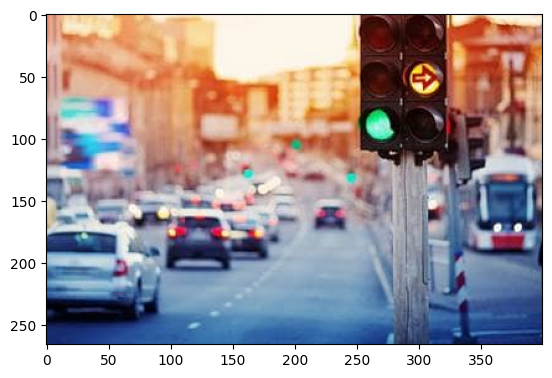

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.6)

In [13]:
print(ClassIndex)

[ 3 10  3  3  6]


In [14]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=2)

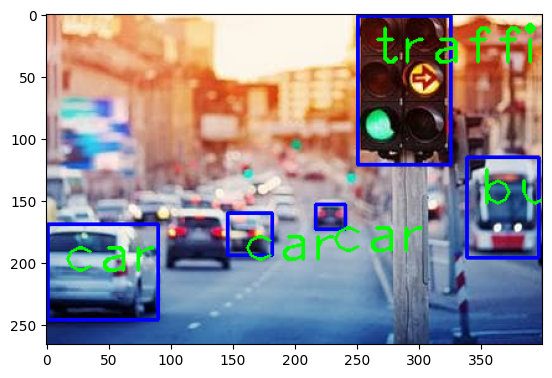

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Video Demo

In [16]:
confThershold=0.5

In [17]:
cap = cv2.VideoCapture("objvideo1.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
        raise IOError("Cannot Video Open")
    
    
front_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidece, bbox = model.detect(frame, confThershold)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassIndex.all()):
                cv2.rectangle(frame,boxes,(255,0,0), 2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0),thickness=3)
                
    cv2.imshow('object_detection' ,frame)
    
    if cv2.waitKey(2)& 0xFF == ord('q'):
        break
        


[1 1]
[1 1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1 1 1]
[1]
[1]
[1]
[1]
[1]
[ 1 73]
[1]
[ 1 73]
[ 1 73]
[1]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73  1]
[ 1 73]
[ 1  1 73]
[ 1  1 73]
[1 1]
[ 1  1 73]
[ 1  1 73]
[ 1  1 73]
[ 1  1 73]
[ 1  1 73]
[1]
[1 1]
[1 1]
[ 1  1 73]
[1 1]
[ 1 73  1]
[ 1 73  1]
[1 1]
[1 1]
[ 1  1 73]
[1 1]
[1 1]
[1 1]
[ 1  1 73]
[1 1]
[ 1 73  1]
[ 1  1 73]
[ 1  1 73]
[ 1  1 73]
[1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1]
[ 1 73]
[ 1 73]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[ 1 77 72]
[ 1 77  1]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[1]
[ 1 77]
[77  1 75]
[ 1 19]
[ 1 19  1]
[ 1 77 72]
[ 1 17]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1 1]


In [18]:
cap.release()
cv2.destroyAllWindows()